# Python for Data Analysis: Pandas

## Lesson Outline
1. Introduction to Pandas
2. Reading from files into Pandas Dataframe
3. Summary attributes & statistics
4. Selecting specific columns
5. Data Manipulation
6. Generating few plots
7. Saving dataframe

# Introduction to Pandas

The Pandas module is Python's fundamental data analytics library and it provides high-performance, easy-to-use data structures and tools for data analysis. Pandas allows for creating pivot tables, computing new columns based on other columns, etc. Pandas also facilitates grouping rows by column values and joining tables as in SQL. A good cheat sheet for Pandas can be found here. Pandas is a very comprehensive and mature module that can be used for advanced data analytics, and this tutorial presents just a very basic overview of Pandas' capabilities.

Source: https://www.featureranking.com/tutorials/python-tutorials/pandas/


Several other Python libraries also work with Pandas objects.

You can have a look at its complete documentation here: https://pandas.pydata.org/docs/index.html

## Reading from files into Pandas Dataframe

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

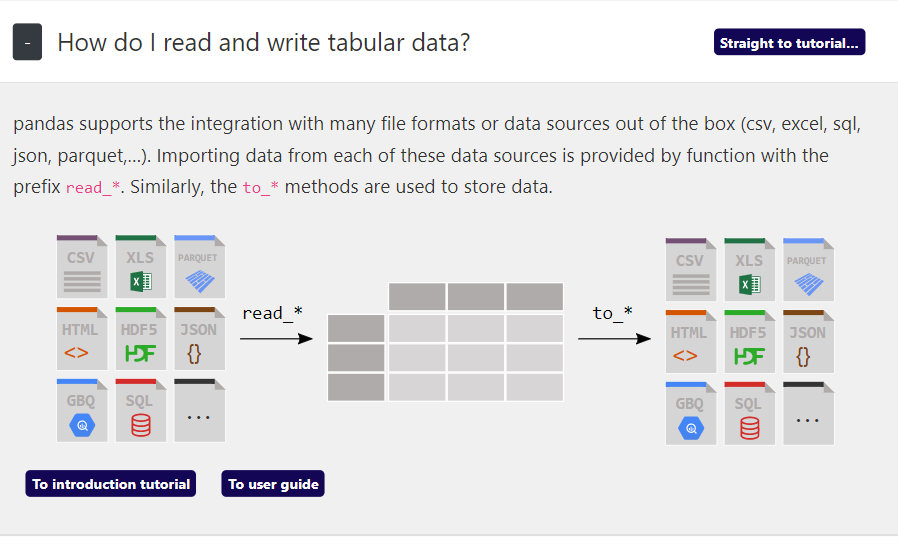

In [2]:
# get the data
core_df = pd.read_csv('CleanedUpCoreData.csv')

In [7]:
 # Defaults to the first 5 lines of the dataframe
core_df.head(10)

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6
5,6442.5,5.85,3.95,40.6,2.7
6,6444.5,0.88,3.50,29.3,5.5
7,6446.5,6.14,4.12,43.1,10.0
8,6448.4,5.27,3.61,33.7,21.9
9,6450.5,6.02,5.92,54.8,0.0


In [8]:
 # if you want to output 20 lines
core_df.head(20)

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6
5,6442.5,5.85,3.95,40.6,2.7
6,6444.5,0.88,3.50,29.3,5.5
7,6446.5,6.14,4.12,43.1,10.0
8,6448.4,5.27,3.61,33.7,21.9
9,6450.5,6.02,5.92,54.8,0.0


## Summary
The function shape counts the number of rows and columns. Thus, number of rows and columns can be obtained with .shape[0] and .shape[1] respectively.

In [10]:
print('The number of rows in our data is: ',core_df.shape[0])
print(' ')
print('The number of columns in our data is: ',core_df.shape[1])

The number of rows in our data is:  167
 
The number of columns in our data is:  5


We can sort the data with respect to a particular column by calling sort_values(). Let's sort the data by df porosity values in descending order. If you want to do it in ascending order, set ascending = True in the command below.

In [11]:
df = core_df.copy()

In [12]:
df.columns

Index(['Depth', 'CorrectedPorosity', 'TOC', 'Quartz', 'Calcite'], dtype='object')

In [14]:
df.sort_values(by='CorrectedPorosity', ascending=True).head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
6,6444.5,0.88,3.50,29.3,5.5
152,6745.9,1.35,1.70,6.4,67.0
132,6700.0,1.41,0.72,5.2,75.7
78,6585.3,1.41,4.91,25.5,2.9
54,6540.0,1.47,1.24,14.4,28.5


describe() generates **descriptive statistics**. Keep in mind that this function excludes **null values**.

In [15]:
df.describe()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6599.828144,4.262934,3.770778,27.963473,12.122156
std,99.953163,1.349560,1.625806,13.875863,19.819573
min,6432.500000,0.880000,0.390000,0.000000,0.000000
25%,6516.150000,3.405000,2.680000,17.450000,0.000000
50%,6594.600000,4.390000,3.900000,29.700000,2.400000
75%,6683.000000,5.205000,4.915000,38.300000,12.700000
max,6784.300000,8.050000,7.480000,59.400000,78.600000


We can also use the following functions to summarize the data. All these methods exclude null values by default.

* count() to count the number of elements.
* value_counts() to get a frequency distribution of unique values.
* unique() to get the number of unique values.
* mean() to calculate the arithmetic mean of a given set of numbers.
* std() to calculate the sample standard deviation of a given set of numbers.
* max() to return the maximum of the provided values.
* min() to return minimum of the provided values.

In [17]:
df.CorrectedPorosity.count()

167

In [19]:
df['CorrectedPorosity'].max()

8.05

## Selecting specific columns and Rows
When there are many columns, we may prefer to select only the ones we are interested in. 

Extract data using rows

loc and iloc are two functions that can be used to slice data from specific row indexes.

* loc – locates the rows by name

loc performs slicing based explicit index.
It takes string indexes to retrieve data from specified rows
* iloc – locates the rows by integer index

iloc performs slicing based on Python’s default numerical index.

Let's say we want to select the "Porosity" and the "Quartz" columns only.

In [20]:
df.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
0,6432.5,6.67,4.15,38.6,0.0
1,6434.5,6.07,4.25,48.6,6.2
2,6436.5,4.91,3.40,41.0,2.5
3,6438.5,6.00,0.39,4.6,66.4
4,6440.6,5.63,3.90,37.0,0.6


In [22]:
df.iloc[:, 1:-1].head()

,CorrectedPorosity,TOC,Quartz
0,6.67,4.15,38.6
1,6.07,4.25,48.6
2,4.91,3.40,41.0
3,6.00,0.39,4.6
4,5.63,3.90,37.0


In [25]:
df[['CorrectedPorosity', 'Quartz']].head()

,CorrectedPorosity,Quartz
0,6.67,38.6
1,6.07,48.6
2,4.91,41.0
3,6.00,4.6
4,5.63,37.0


You can also create a new dataframe, df_subset from the original dataframe, df by selecting only a few columns

In [26]:
df.columns

Index(['Depth', 'CorrectedPorosity', 'TOC', 'Quartz', 'Calcite'], dtype='object')

In [27]:
df_subset = pd.DataFrame(df, columns=['Depth', 'CorrectedPorosity', 'TOC'])
df_subset.head()

,Depth,CorrectedPorosity,TOC
0,6432.5,6.67,4.15
1,6434.5,6.07,4.25
2,6436.5,4.91,3.40
3,6438.5,6.00,0.39
4,6440.6,5.63,3.90


You can also select **specific ranges of values and create a new dataframe**.

Here I am selecting all entries with 'Porosity' values less than 5.0

In [28]:
df_subsetPorosity = df[df['CorrectedPorosity'] < 5.0] 
df_subsetPorosity.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
2,6436.5,4.91,3.40,41.0,2.5
6,6444.5,0.88,3.50,29.3,5.5
10,6452.5,4.46,3.15,50.0,7.0
12,6456.5,4.42,2.49,27.3,21.1
15,6463.2,2.52,2.50,20.4,31.0


Here I am selecting all entries with 'Porosity' values less than 5.0 and all 'Quartz' values less than 20.0.

In [31]:
df_subset = df[(df['CorrectedPorosity'] < 5.0) & (df['Quartz'] < 20.0)] 
df_subset.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
16,6464.5,2.70,1.51,3.7,28.5
17,6466.5,2.77,1.70,11.1,36.8
18,6468.5,2.09,0.83,6.8,61.3
19,6470.5,1.96,1.14,10.6,45.8
20,6472.7,2.13,1.29,10.3,53.4


Here I am selecting all entries with 'Depth' greater than 6500 and lesser than 6600.

In [32]:
df.Depth.max()

6784.3

In [33]:
df.Depth.min()

6432.5

In [34]:
df_subset = df[(df['Depth'] > 6500) & (df['Depth'] < 6600)] 
df_subset.head()

,Depth,CorrectedPorosity,TOC,Quartz,Calcite
34,6501.2,2.73,1.07,2.3,42.3
35,6503.6,5.22,2.34,10.4,16.3
36,6505.6,4.83,2.44,9.8,11.1
37,6507.4,3.66,2.69,7.2,10.9
38,6509.5,1.82,1.11,6.3,56.8


## Data Manipulation
### Handling missing values
Dealing with missing values is a time consuming but crucial task. We should first identify the missing values and then try to determine why they are missing.

There are two basic strategies to handle missing values:

* Remove rows and columns with missing values.
* Impute missing values, replacing them with predefined values.

Missing values are a bit complicated in Python as they can be denoted by either "na" or "null" in Pandas (both mean the same thing). Furthermore, NumPy denotes missing values as "NaN" (that is, "not a number").

First, let's count the number of missing values in each column.

In [36]:
df.isnull().sum()  #  count the number of missing values in each column

Depth                0
CorrectedPorosity    0
TOC                  0
Quartz               0
Calcite              0
dtype: int64

The function dropna() drops rows with at least one missing value.

In [ ]:
# df.dropna(axis=1)

In [ ]:
# df.fillna(df.mean(), axis=1)

## A Few Plotting Routines 
Pandas allows for direct visualization of a data frame's columns. First, let's prepare the plotting environment using Matplotlib.

In [37]:
df.columns

Index(['Depth', 'CorrectedPorosity', 'TOC', 'Quartz', 'Calcite'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025188A99548>,
      dtype=object)

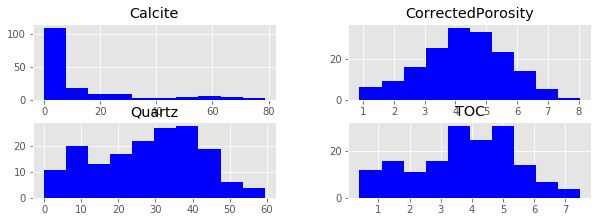

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df.iloc[:, 1:].hist(figsize=(10, 5), layout=(3, 2), color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025188FBDE08>,
      dtype=object)

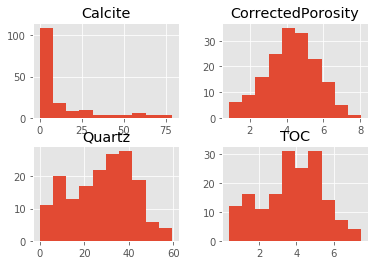

In [46]:
df.hist(['CorrectedPorosity', 'TOC', 'Quartz', 'Calcite'])

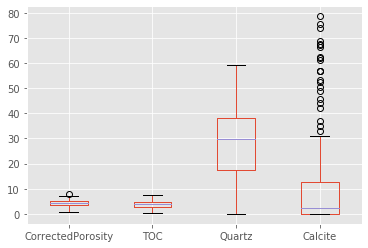

In [48]:
df.boxplot(column=['CorrectedPorosity', 'TOC', 'Quartz', 'Calcite'])

Alternatively, we can examine the histogram of these columns.

## Save your dataframe

In [49]:
df.to_csv('core_data.csv')